In [1]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('/Users/shivendragupta/Desktop/Deep Learning/ANN/Social_Network_Ads.csv')

In [40]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [41]:
df.shape

(400, 5)

In [42]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [43]:
X = df.iloc[:,1:4]
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [44]:
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X)
X_train_trf

array([[-1.78179743, -1.49004624, -1.02020406,  1.02020406],
       [-0.25358736, -1.46068138, -1.02020406,  1.02020406],
       [-1.11320552, -0.78528968,  0.98019606, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138,  0.98019606, -0.98019606],
       [-0.15807423, -1.07893824, -1.02020406,  1.02020406],
       [ 1.08359645, -0.99084367,  0.98019606, -0.98019606]])

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
ohe = OneHotEncoder(sparse_output=True)

X_ohe = ohe.fit_transform(X[['Gender']])
X_ohe = X_ohe.toarray()

In [48]:
gender_df = pd.DataFrame(X_ohe,columns=['female','male'])
gender_df

,female,male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
395,1.0,0.0
396,0.0,1.0
397,1.0,0.0
398,0.0,1.0


In [49]:
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [50]:
X = X.drop(columns=['Gender'])
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [54]:
X = pd.concat([X, gender_df], axis=1)
X

,Age,EstimatedSalary,female,male
0,19,19000,0.0,1.0
1,35,20000,0.0,1.0
2,26,43000,1.0,0.0
3,27,57000,1.0,0.0
4,19,76000,0.0,1.0
...,...,...,...,...
395,46,41000,1.0,0.0
396,51,23000,0.0,1.0
397,50,20000,1.0,0.0
398,36,33000,0.0,1.0


In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [85]:
model = Sequential()

In [86]:
X_train_trf

array([[-1.78179743, -1.49004624, -1.02020406,  1.02020406],
       [-0.25358736, -1.46068138, -1.02020406,  1.02020406],
       [-1.11320552, -0.78528968,  0.98019606, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138,  0.98019606, -0.98019606],
       [-0.15807423, -1.07893824, -1.02020406,  1.02020406],
       [ 1.08359645, -0.99084367,  0.98019606, -0.98019606]])

In [87]:
model.add(Dense(10,activation="relu",input_dim = 4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171 (684.00 B)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [90]:
history = model.fit(X_train_trf,y,batch_size=1,verbose=True,epochs=100,validation_split=.2) # for stochastic choose batch_size = 1

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.6616 - loss: 0.6670 - val_accuracy: 0.4375 - val_loss: 0.7344
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.7931 - loss: 0.4475 - val_accuracy: 0.6625 - val_loss: 0.6086
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8777 - loss: 0.3173 - val_accuracy: 0.6750 - val_loss: 0.5313
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.8541 - loss: 0.3246 - val_accuracy: 0.7875 - val_loss: 0.4580
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.8517 - loss: 0.3071 - val_accuracy: 0.8750 - val_loss: 0.3871
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.8525 - loss: 0.2938 - val_accuracy: 0.9125 - val_loss: 0.3579
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8670 - loss: 0.2616 - val_accuracy: 0.9250 - val_loss: 0.3189
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8550 - loss: 0

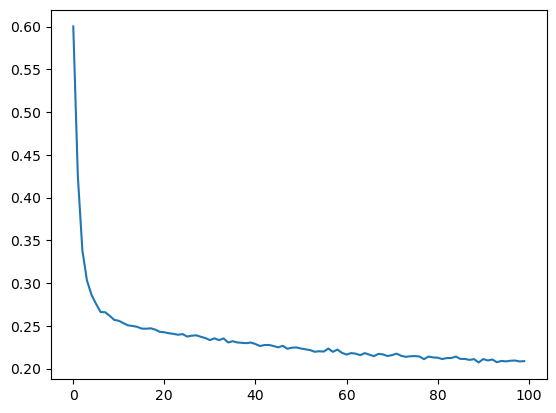

In [91]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

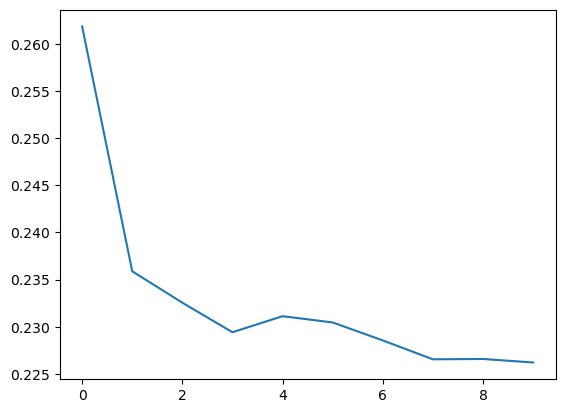

In [82]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [70]:
y_pred = model.predict(X_train_trf)
y_pred.shape

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


(400, 1)

In [71]:
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

In [72]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y_pred)

0.91